In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\mnuri\\OneDrive\\Documents\\Data Analysis with Python\\Project 1 User Retentaation Analysis'

In [3]:
df = pd.read_csv('online_retail.csv', header=0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df_clean = df.copy()
# konversi invoiceDate jadi datetime
df_clean ['InvoiceDate'] = df_clean['InvoiceDate'].astype('datetime64[ns]')
# kolom year month
df_clean ['Year Month'] = df_clean ['InvoiceDate'].dt.to_period('M')
# hapus semua baris tanpa kolom customer id
df_clean = df_clean[~df_clean['CustomerID'].isna()]
# hapus semua baris tanpa kolom description
df_clean = df_clean[~df_clean['Description'].isna()]
# mengubah semua huruf description menjadi kecil
df_clean['Description'] = df_clean['Description'].str.lower()
# membuat kolom order status dengan nilai "cencelled" jika InvoiceNo diawali dengan huruf 'c' dan 'delivered' jika InvoiceNo tanpa awalan huruf 'c'
df_clean ['Order Status'] = np.where(df_clean['InvoiceNo'].str[:1]=='C', 'cancelled', 'delivered')
# menghapus baris dengan unitprice bernial negatif
df_clean = df_clean[df_clean['UnitPrice']>0]
# membuat nilai amount dengan perkalian antara quantity dan unitprice
df_clean['Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']
# mengganti description dari stockcode yang memiliki beberapa description dengan salah satu description-nya yang paling sering muncul
most_freq_product_name = df_clean.groupby(['StockCode','Description'], as_index=False).agg(order_cnt=('InvoiceNo','nunique')).sort_values(['StockCode','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('StockCode')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'Description':'most_freq_Description'}), how='left', on='StockCode')
df_clean['Description'] = df_clean['most_freq_Description']
df_clean = df_clean.drop(columns='most_freq_Description')
# mengkonversi customer_id menjadi string
df_clean['CustomerID'] = df_clean['CustomerID'].astype(str)
# menghapus outlier
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['Quantity','Amount']]))<3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True)
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year Month,Order Status,Amount
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,delivered,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,delivered,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,delivered,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,delivered,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,delivered,20.34
...,...,...,...,...,...,...,...,...,...,...,...
406412,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,delivered,10.20
406413,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,delivered,12.60
406414,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,delivered,16.60
406415,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,delivered,16.60


In [6]:
# object to int
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df['InvoiceNo'] = df['InvoiceNo'].fillna(-1).astype('int')

# float to int
df['UnitPrice'] = df['UnitPrice'].astype('int')
df['CustomerID'] = df['CustomerID'].astype('Int64')

# object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  int64         
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  int64         
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  object        
dtypes: Int64(1), datetime64[ns](1), int64(3), object(3)
memory usage: 33.6+ MB


In [8]:
df_clean['Amount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
406412    10.20
406413    12.60
406414    16.60
406415    16.60
406416    14.85
Name: Amount, Length: 406417, dtype: float64

In [9]:
df_status_summary = df_clean.groupby('Order Status', as_index=False).agg(order_cnt=('InvoiceNo','nunique'),total_amount=('Amount','sum'))
df_status_summary

,Order Status,order_cnt,total_amount
0,cancelled,3626,-224351.800
1,delivered,18444,8086781.484


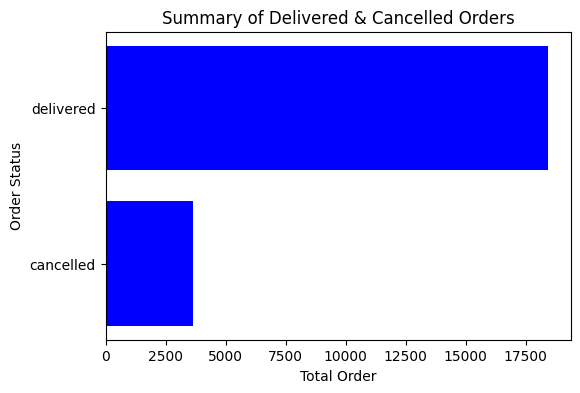

In [10]:
fig = plt.figure(figsize=(6, 4))
plt.barh(df_status_summary['Order Status'], df_status_summary['order_cnt'],
         color='blue')
plt.xlabel('Total Order')
plt.ylabel('Order Status')
plt.title('Summary of Delivered & Cancelled Orders')
plt.show()

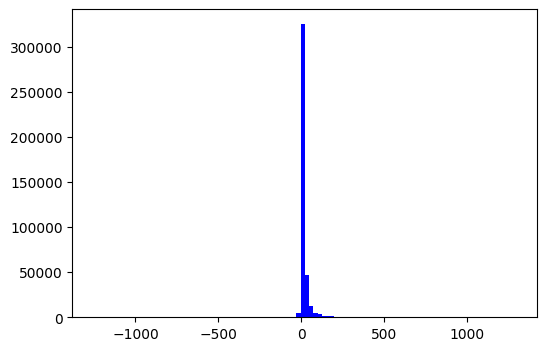

In [11]:
fig = plt.figure(figsize=(6, 4))
plt.hist(df_clean.loc[df_clean['Description'].str.contains(''), 'Amount'], 100,
         color='blue')
plt.show()

In [12]:
df_date_summary = df_clean.groupby('InvoiceDate', as_index=False).agg(order_cnt=('InvoiceNo','nunique'))
df_date_summary

,InvoiceDate,order_cnt
0,2010-12-01 08:26:00,1
1,2010-12-01 08:28:00,1
2,2010-12-01 08:34:00,2
3,2010-12-01 08:35:00,1
4,2010-12-01 08:45:00,1
...,...,...
20351,2011-12-09 12:23:00,1
20352,2011-12-09 12:25:00,1
20353,2011-12-09 12:31:00,1
20354,2011-12-09 12:49:00,1


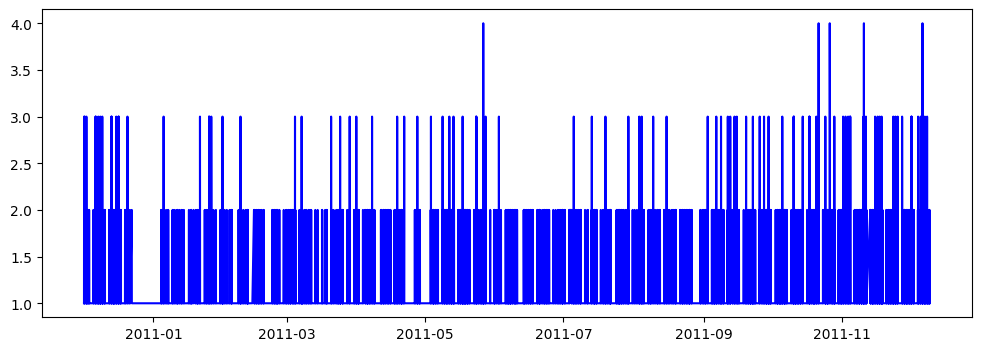

In [13]:
fig = plt.figure(figsize=(12, 4))
plt.plot('InvoiceDate', 'order_cnt', data=df_date_summary, color='blue', linestyle='-')
plt.show()

In [14]:
df_user_monthly = df_clean.groupby(['CustomerID','Year Month'], as_index=False).agg(order_cnt=('InvoiceNo','nunique'))
df_user_monthly

,CustomerID,Year Month,order_cnt
0,12347.0,2010-12,1
1,12347.0,2011-01,1
2,12347.0,2011-04,1
3,12347.0,2011-06,1
4,12347.0,2011-08,1
...,...,...,...
13635,18283.0,2011-10,1
13636,18283.0,2011-11,4
13637,18283.0,2011-12,1
13638,18287.0,2011-05,1


In [15]:
df_user_monthly['cohort'] = df_user_monthly.groupby('CustomerID')['Year Month'].transform('min')
df_user_monthly

,CustomerID,Year Month,order_cnt,cohort
0,12347.0,2010-12,1,2010-12
1,12347.0,2011-01,1,2010-12
2,12347.0,2011-04,1,2010-12
3,12347.0,2011-06,1,2010-12
4,12347.0,2011-08,1,2010-12
...,...,...,...,...
13635,18283.0,2011-10,1,2011-01
13636,18283.0,2011-11,4,2011-01
13637,18283.0,2011-12,1,2011-01
13638,18287.0,2011-05,1,2011-05


In [16]:
from operator import attrgetter

df_user_monthly['period_num'] = (df_user_monthly['Year Month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly

,CustomerID,Year Month,order_cnt,cohort,period_num
0,12347.0,2010-12,1,2010-12,1
1,12347.0,2011-01,1,2010-12,2
2,12347.0,2011-04,1,2010-12,5
3,12347.0,2011-06,1,2010-12,7
4,12347.0,2011-08,1,2010-12,9
...,...,...,...,...,...
13635,18283.0,2011-10,1,2011-01,10
13636,18283.0,2011-11,4,2011-01,11
13637,18283.0,2011-12,1,2011-01,12
13638,18287.0,2011-05,1,2011-05,1


In [17]:
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort', columns='period_num', values='CustomerID', aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort,,,,,,,,,,,,,
2010-12,942.0,360.0,314.0,364.0,339.0,374.0,358.0,333.0,334.0,371.0,353.0,472.0,259.0
2011-01,420.0,103.0,121.0,101.0,140.0,128.0,111.0,110.0,133.0,147.0,155.0,64.0,NaN
2011-02,380.0,94.0,73.0,106.0,101.0,93.0,97.0,106.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,111.0,96.0,102.0,77.0,115.0,105.0,126.0,38.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,277.0,66.0,48.0,48.0,60.0,68.0,74.0,28.0,NaN,NaN,NaN,NaN,NaN
2011-06,236.0,49.0,44.0,65.0,57.0,78.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,190.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cohort_size = df_cohort_pivot.iloc[:,0]
cohort_size

cohort
2010-12    942.0
2011-01    420.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    277.0
2011-06    236.0
2011-07    190.0
2011-08    167.0
2011-09    297.0
2011-10    352.0
2011-11    320.0
2011-12     40.0
Freq: M, Name: 1, dtype: float64

In [19]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort,,,,,,,,,,,,,
2010-12,1.0,0.382166,0.333333,0.386412,0.359873,0.397028,0.380042,0.353503,0.354565,0.393843,0.374735,0.501062,0.274947
2011-01,1.0,0.245238,0.288095,0.240476,0.333333,0.304762,0.264286,0.261905,0.316667,0.350000,0.369048,0.152381,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.265789,0.244737,0.255263,0.278947,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.252273,0.218182,0.231818,0.175000,0.261364,0.238636,0.286364,0.086364,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.238267,0.173285,0.173285,0.216606,0.245487,0.267148,0.101083,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.207627,0.186441,0.275424,0.241525,0.330508,0.101695,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.210526,0.205263,0.231579,0.273684,0.115789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


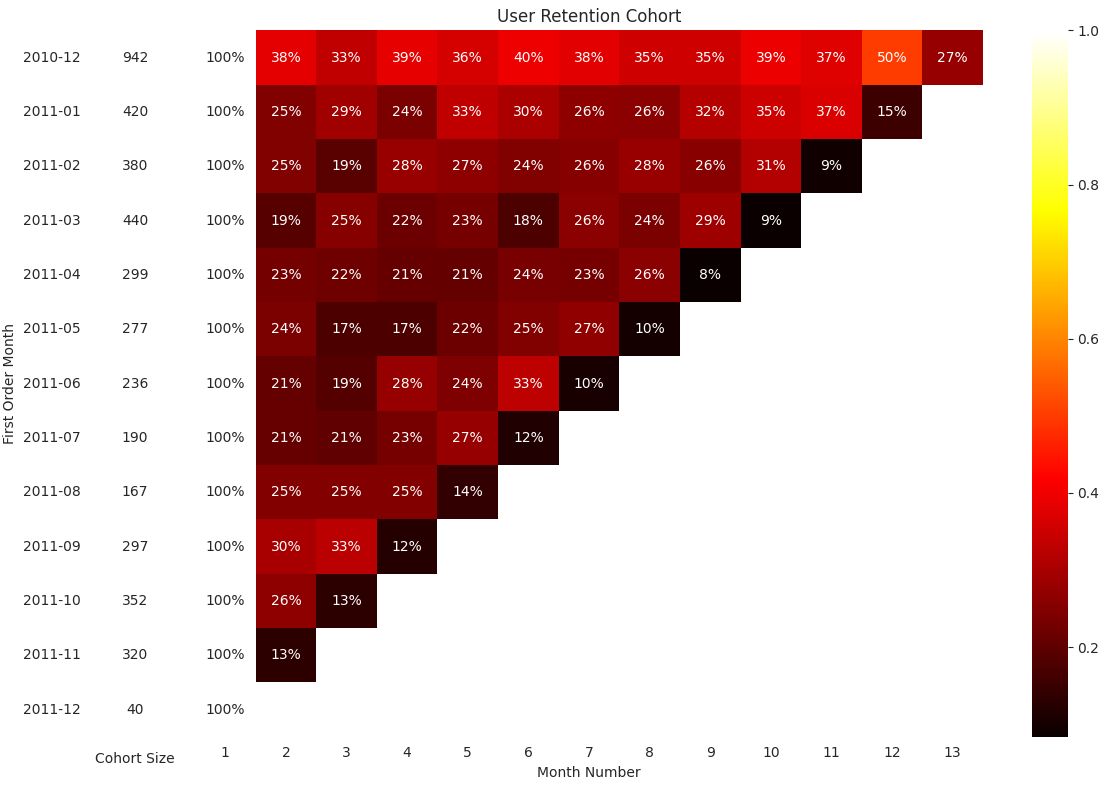

In [20]:
with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='hot', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

    fig.tight_layout()